## matplotlib, pyplot und pylab

### Quickstart

Fuer die Parameter der Plotbefehle und weitere Beispiele


always refer to the manual : <a href="http://matplotlib.org/api/pyplot_api.html">Pyplot API</a>

In [1]:
#IPython magic Kommando %matplotlib, um geeignete Grafiktreiber zu laden
%matplotlib inline
from pylab import * # plt (pyplot), np (numpy), mpl (matplotlib)

In [ ]:
#Daten vorbereiten

In [ ]:
# erzeugen von einer oder mehreren Grafiken (figures) mit einem
# oder mehreren Subplots (axes).
fig1, ax1 = plt.subplots(ncols=1,nrows=1,...,num="Figure Name 1") 
fig2, ax2 = plt.subplots(ncols=1,nrows=1,...,num="Figure Name 2") 
# figure Objekt fig1 und array ax1 von axes Objekten (einfaches axes Objekt, wenn nur ein Subplot)

# ALLE plt BEFEHLE beziehen sich auf die "aktuelle figure" (gcf()) und die "aktuellen axes" (gca())
# die aktuelle figure/axes sind die Figur und der Subplot, in die zuletzt gezeichnet wurde.
# Wenn Sie die figure und axes Objekte fig1 und axs1 haben, dann koennen die Plotanweisungen
# auch direkt ueber diese Namen aufgerufen werden, z.B.
p1, = ax1.plot(...)         # ax1[i,j] fuer mehrere subplots
ax1.set_property(...)   # zum setzen irgendeiner axes Eigenschaft. 
                         # set_property(...) funktioniert mit allen artist Objekten
plt.setp(ax1, property1=..., property2=..., ...) # zum formatieren von irgendeinem plot Objekt
plt.getp(ax1)          # anzeigen aller Eigenschaften

plt.show() # zeichnet alle Figuren, Plots, Subplots etc.

In [ ]:
# abspeichern einer Figur in einem bestimmten Grafikformat
fig1.savefig(fname, dpi=None, facecolor='w', edgecolor='w', format=None, transparent=False, ...)
# von den meisten backends werden die Formate 'png', 'jpg', 'svg' und 'eps' unterstuetzt
# png und jpg sind Bitmap Formate mit festgelegter Aufloesung (dpi)
# svg und eps sind Vektorgrafik Formate, welche in jeder Zoom-Stufe hochaufloesend sind.

#### Aufbereitung von plots
```python
plt.xlabel(...), ax1.set_xlabel(...) # Axenbezeichnungen. Latex Ausdruecke zwischen $ $
plt.ylabel(...), ax1.set_ylabel(...)

plt.title(...), ax1.set_title(...) # Titel eines Diagrams

plt.set_cmap # colormap definiert die zu verwendende Farbskala, z.B. fuer einen Hoehenplot
plt.axes([left,bottom,width,height]) # ein neues axes Objekt an beliebige Stelle setzen
```
mit `plt.`, `ax1.` oder ohne Prefix aufrufbar (bezieht sich auf axes Objekt) :
```python
legend(...)              # Legende einfuegen (mit labels der einzelnen Plotelemente)
text(...)                # Textausgabe im Plot
arrow(...)               # Pfeil im Diagram
annotate(...)            # Text mit Pfeil zu einem Datenpunkt
colorbar(...)            # Ausgabe der Farbskala mit Wertebereich
grid(...)                # Gitterlinien zeichnen
xlim(...), ylim(...), axis(...)       # Wertebereich der Koordinatenaxen
clabel(...) # Label fuer Contour Plots
minorticks_on(), minorticks_off() # ein- und ausschalten von feinen Axenmarkierungen
table(...)                        # fuegt eine Tabelle an eine Seite des Plots an (nicht ausgereift)
tick_params(...)                  # Formatierung der Axendarstellung (oben, unten, Farbe ...)
tight_layout(...)                 # Einstellen der Raender zwischen den Subplots und zum figure Rand.
twinx(...), twiny(...)  # zweites axes Objekt um zwei Datensaetze in ein Diagram zu zeichnen
xscale(...), yscale(...) # Veraendern der Skalierung : 'linear', 'log', 'logit', 'symlog'
xticks(...), yticks(...) # festlegen der Textausgabe an den Axenmarkierungen
```

Das `matplotlib` Modul unterscheidet drei Klassen von Objekten : 

- Die `pyplot` Benutzerschnittstelle, oder `pyplot` modul, stellt Funktionen zum Plotten zur Verfuegung.
- Plots bestehen aus *Artist* Objekten. Jeder Artist repraesentiert einen Teil des Plots, z.B. eine Linie, ein Koordinatensystem, eine Polygonflaeche, ein Text etc. .
- Und schliesslich gibt es *Backends* welche die Plots auf verschiedenen Betriebssystemen und in verschiedenen Ausgabeformaten erzeugen.

**`pylab`** ist ein Modul, welches `matplotlib` sowie `pyplot` und `numpy` Funktionen in den globalen Namespace laedt, um die Anweisungen beim interaktiven Plotten zu vereinfachen.

```python    
from pylab import *   
# laedt alles in den globalen Namespace, aber auch in plt (pyplot) und np (numpy), mpl (matplotlib)
```



### workflow

Beim Plotten in IPython gibt es verschiedene moegliche Arbeitsablaeufe.

- Die Ausgabe der Plots kann im IPython Notebook (inline) erfolgen
```python    
%matplotlib inline
```
Eine Notebook Zelle sollte alle Anweisungen enthalten, um den oder die Plots vollstaendig im gewuenschten Layout zu erstellen. Die letzte Anweisung in der Zelle `plt.show()` gibt saemtliche Plots aus. Ist man mit dem Ergebnis nicht zufrieden, werden die Anweisungen in der Zelle veraendert und der Code erneut ausgefuehrt.

- in den neueren Jupyter notebooks funktioniert
```python
%matplotlib notebook
```
wie `inline` aber mit interaktiver Ausgabe!

- oder in separaten Fenstern. Ist man nicht im interaktiven Modus, so kann man erst weiterarbeiten, wenn das Grafikfenster wieder geschlossen ist. Man schaltet den interaktiven Modus an bzw. aus mit
```python 
#interaktiven Modus vorbereiten :
%matplotlib
#interaktiven Modus ein-/ausschalten :
plt.ion()
plt.ioff()
```
im interaktiven Modus bei Ausgabe in einem externen Fenster, kann man die Eigenschaften des Plots nachtraeglich veraendern, was vor allem in der IPython Shell Umgebung (bzw. qtconsole) nuetzlich ist.


Nach Aufruf von des IPython Magic Befehls `%matplotlib inline` kann man nicht mehr in einem separatem Fenster plotten, ohne den Python Kernel neu zu starten. Inline Plots haben standardmaessig eine geringere Aufloesung als in separaten Fenstern und man kann nicht interaktiv zoomen, den Plotbereich verschieben oder das Bild abspeichern.

Die meisten `pyplot` Anweisungen erzeugen oder modifizieren Artist Objekte, welche eine Vielzahl von Eigenschaften haben : Farben, Transparenz, Linienart, Schriftgroesse und Schriftart etc. . Diese Eigenschaften lassen sich bei Erzeugung als Schluesselwortargumente setzen. Diese Objekte werden von den erzeugenden Funktionen als Funktionswerte zurueckgeliefert und koennen so benannt werden, um sie weiter zu bearbeiten.

```python
fig1 = plt.figure(1)
p1, = plt.plot(x,y,linestyle='--',color='red') #Komma nach p1 entpackt Liste!
p1.set_marker('o')
p1.set_color('green')
```

Die Liste moeglicher Eigenschaften wird entweder mit z.B. `plt.plot?` ausgegeben oder durch `getp(object)` fuer ein spezifisches Artist Objekt.

Plotbefehle beziehen sich auf aktuelle Axen (current axes) einer aktuellen Figur (current figure) zwischen denen automatisch oder manuell umgeschaltet werden kann.
```python
fignow = gcf() # get current figure
axnow  = gca() # get current axes
```



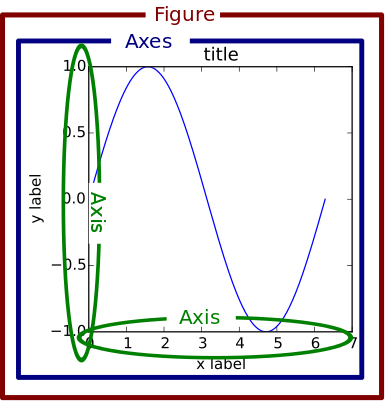

In [2]:
from IPython.display import Image
Image(filename="./fig_map.png", width=250)



Jeder Plot Befehl fuegt ein weiteres Artist Objekt zur aktuellen Figur/Axe hinzu, d.h. man kann die Komponenten eines Plots schrittweise aufbauen.

In [3]:
def show_object_tree(obj,sep='') :
    T = [obj]
    print(sep+str(type(obj)))
    try :
        children = get(obj,'children')
    except AttributeError :
        return T
    for child in children :
        T.extend(show_object_tree(child,sep+'     '))
    return(T)

### Linien Plots und Scatter Plots

In einfachen 2d Plots werden y-Werte ueber x-Werten aufgetragen. Es koennen verschiedene Marker gesetzt werden und die Punkte koennen mit Linien verbunden sein. Man kann die Farbe und Transparanz aller Linien und Flaechen festlegen.

Das Gebiet, ueber welches geplottet werden soll ist normalerweise der gesamte Wertebereich der x- und y-Daten. Man kann jedoch den Axenausschnitt mit

`xlim(xmin,xmax)` und<br>
`ylim(ymin,ymax)` bzw.<br>
`xlim(xmin=...)` etc. manuell setzen.

#### einfache plots
```python
p0, p1, ... = plot(x0, y0, fmt0, x1, y1, fmt1, ..., **kwargs)
p0, p1, ... = semilogx(x0, y0, fmt0, x1, y1, fmt1, ..., **kwargs) # x-Achse logarithmisch
p0, p1, ... = semilogy(x0, y0, fmt0, x1, y1, fmt1, ..., **kwargs) # y-Achse logarithmisch
p0, p1, ... = loglog(x0, y0, fmt0, x1, y1, fmt1, ..., **kwargs)   # doppelt logarithmisch
```
plottet mehrere x- und y-Daten als Linien Plot in ein Diagram. die Formatierungsstrings `fmt` sind optional fuer einfache Farbdefinitionen, Marker- und Linientypen, welche durch die Strings in den untenstehenden Tabellen definiert sind. Die Schluesselwortargumente `**kwargs` legen Formateigenschaften aller Linien Plots fest. Plot gibt eine Liste mit Line2D Objekten zurueck.

character | line style 
:-----------:|-----------
'-' 	| solid line style 
'--' 	| dashed line style 
'-.' 	| dash-dot line style
':' 	| dotted line style


character |	marker |character |	marker |character |	marker 
:-----------:|-----------|:----------:|------------------|:---------:|---------------
'.' 	| point marker|',' 	| pixel marker |'o' 	| circle marker
'v' 	| triangle_down marker|'^' 	| triangle_up marker |'<' 	| triangle_left marker
'>' 	| triangle_right marker|'1' 	| tri_down marker| '2' 	| tri_up marker
'3' 	| tri_left marker|'4' 	| tri_right marker|'s' 	| square marker
'p' 	| pentagon marker|'*' 	| star marker|'h' 	| hexagon1 marker
'H' 	| hexagon2 marker|'+' 	| plus marker|'x' 	| x marker
'D' 	| diamond marker|'d' 	| thin_diamond marker|'`\`' 	| vline marker
'_' 	| hline marker| | |

character |	color
:------:|---------
‘b’ 	|blue
‘g’ 	|green
‘r’ 	|red
‘c’ 	|cyan
‘m’ 	|magenta
‘y’ 	|yellow
‘k’ 	|black
‘w’ 	|white

Die Farben koennen auch mit Schluesselwortargumenten `color`, `markeredgecolor` und `markerfacecolor` gesetzt werden. Neben den Zeichen in der Tabelle koennen Farben auch als String z.B. `"green"`, Hexstrings z.B. `"#AF0016"`, Graustufenstring von `"0.0"` bis `"1.0"`, RGB Tupel z.B. `(0.5,0,0.1)` oder RGBalpha Tupel z.B. `(0.5,0,0.1,0.2)` spezifiziert werden. Alpha legt die Transparenz fest, d.h. `alpha=0.0` ist unsichtbar.


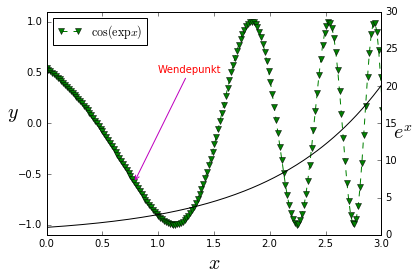

<class 'matplotlib.axes._subplots.AxesSubplot'>
     <class 'matplotlib.lines.Line2D'>
     <class 'matplotlib.spines.Spine'>
     <class 'matplotlib.spines.Spine'>
     <class 'matplotlib.spines.Spine'>
     <class 'matplotlib.spines.Spine'>
     <class 'matplotlib.axis.XAxis'>
          <class 'matplotlib.text.Text'>
          <class 'matplotlib.text.Text'>
          <class 'matplotlib.axis.XTick'>
               <class 'matplotlib.lines.Line2D'>
               <class 'matplotlib.lines.Line2D'>
               <class 'matplotlib.lines.Line2D'>
               <class 'matplotlib.text.Text'>
               <class 'matplotlib.text.Text'>
          <class 'matplotlib.axis.XTick'>
               <class 'matplotlib.lines.Line2D'>
               <class 'matplotlib.lines.Line2D'>
               <class 'matplotlib.lines.Line2D'>
               <class 'matplotlib.text.Text'>
               <class 'matplotlib.text.Text'>
          <class 'matplotlib.axis.XTick'>
               <class 'matplotlib.

In [8]:
x = linspace(0,5,300)
y = cos(exp(x))
plot(x,y,'gv--',label='$\cos(\exp x)$',markeredgecolor='k')
ylim(-1.1,1.1)
legend(loc='best')
xlabel('$x$',fontsize=20)
ylabel('$y$',rotation=0,fontsize=20)
annotate(s='Wendepunkt',xy=(pi/4,cos(exp(pi/4))),xytext=(1,0.5),arrowprops={'arrowstyle':"->",'color':'m'},color='r')

ax2=twinx()
ax2.plot(x,exp(x),'k')

xlim(xmax=3)

ylim(ymax=30)
ylabel('$e^x$',rotation=0,fontsize=20)

show()

T=show_object_tree(ax2)

#### Fuer Scatter Plots (Marker ohne Linien)
```python
scatter(x,y,s=20,c=None, marker=u'o', ...) # s(ize) und c(olor) koennen auch Arrays sein
```

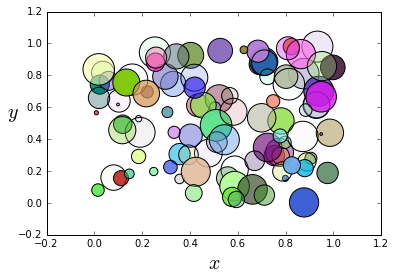

In [9]:
N=100
x = np.random.rand(N)
y = np.random.rand(N)
s= np.random.rand(N)*1000    # Markersize in pixels
c= np.random.rand(N,4)      # RGBAlpha Werte

scatter(x,y,s,c)

xlabel('$x$',fontsize=20)
ylabel('$y$',fontsize=20,rotation=0)

show()

#### Fuer Plots mit Fehlerbalken
```python
errorbar(x, y, yerr=None, xerr=None, fmt=u'',...)
```
hierbei sind `xerr` und `yerr` Felder der Dimension N, Nx1 oder 2xN, welche die Fehlergroessen in x und y Richtung angeben.



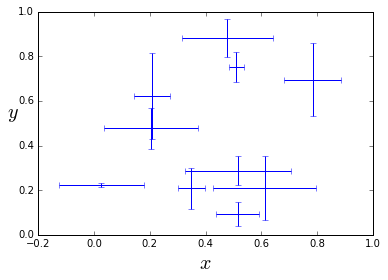

In [11]:
N=10
x = np.random.rand(N)
y = np.random.rand(N)
dx= np.random.rand(N)*0.2
dy= np.random.rand(N)*0.2

errorbar(x,y,dx,dy,' ')

xlabel('$x$',fontsize=20)
ylabel('$y$',fontsize=20,rotation=0)

show()

#### triplot
```python
triplot(x, y, ...)
```

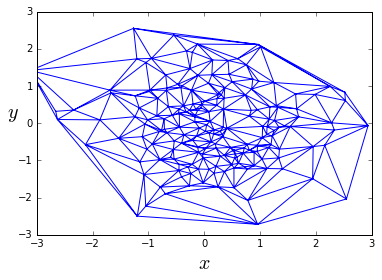

In [12]:
N=200
x=np.random.randn(N)
y=np.random.randn(N)
plt.triplot(x,y)
xlabel('$x$',fontsize=20)
ylabel('$y$',fontsize=20,rotation=0)
xlim(-3,3)
ylim(-3,3)
show()

#### hist

Histogramme sind scheinbar intuitiv, haben aber ein paar kozeptionelle Fallstricke. Zunaechst gibt es drei verschiedene Dinge, die mit einem Histogramm dargestellt werden :

- Es wird ein Intervall auf der x-Achse in nicht-ueberlappende "Bins" aufgeteilt. Danach wird eine grosse Zahl von x-Werten untersucht und die **Anzahl oder Frequenz** der x-Werte, welche in einem Bin liegen wird ueber diesem Bin in y-Richtung meist als Bar Plot aufgetragen. 
- Teilt man die Zahl der Datenpunkte in einem Bin durch die Gesamtanzahl aller Punkte, so erhaelt man die **Wahrscheinlichkeit**, dass ein zufaellig ausgewaehlter Datenpunkt in diesem Bin liegt. 
- Teilt man diese Wahrscheinlichkeit durch die Groesse des Bins, so erhaelt man die mittlere **Wahrscheinlichkeitsdichte** in diesem Bin.

Die Groesse der Bins muss dabei nicht konstant sein. Die Wahl des Grundintervalls und dessen Einteilung in moeglicherweise verschiedene Bins ist Ermessenssache. Ergebnisse haengen stark von der Wahl der Bins ab.

Desweiteren kann man Wahrscheinlichkeiten nur schaetzen, wenn man genuegend Ereignisse mit einer bestimmten Wahrscheinlichkeit beobachtet. Die Anzahl der Datenpunkte in einem Bin sollte daher gross sein. Als Faustregel kann man davon ausgehen, dass fuer N Datenpunkte ein Histogramm mit N/10 Bins ein aussagekraeftiges Ergebniss gibt.

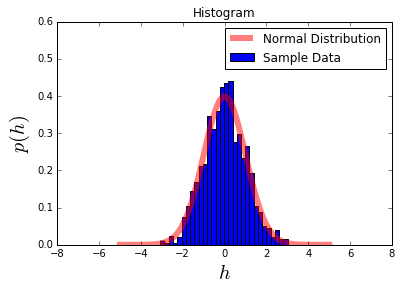

In [13]:
h = np.random.randn(1000)
hx=linspace(-5,5,100)
plot(hx,exp(-hx**2/2)/sqrt(2*pi),color=(1,0,0,0.5),linewidth=6,label='Normal Distribution')
hist(h,30,normed=True,label='Sample Data')
xlabel('$h$',fontsize=20)
xlim((-8,8))
ylim((0,0.6))
ylabel('$p(h)$',fontsize=20)
legend()
title("Histogram")
show()

#### bar

bar(left, height, width=0.8, bottom=None, hold=None, data=None, **kwargs)

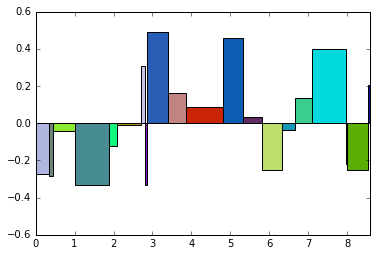

In [15]:
N=20
x=np.random.rand(N)
y=np.random.rand(N)-0.5
c=np.random.rand(N,3)

l=cumsum(x)-x

bar(left=l,height=y,width=x,color=c)

axis('tight')
ylim(-.6,.6)

show()



#### contour, imshow

Die `numpy` Funktion  `meshgrid(x,y)` wird benutzt, um aus zwei Containern mit `x`- und `y`-Werten zwei 2d Arrays `X` und `Y` zu erstellen.

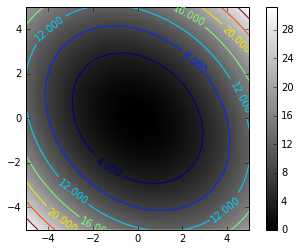

In [16]:
x=linspace(-5,5,201)
y=linspace(-5,5,201)
X,Y = meshgrid(x,y)
z2=X**2/2+Y**2/2+0.25*X*Y
plt.imshow(z2,interpolation='none',origin='lower',extent=[-5,5,-5,5],cmap="gray")
colorbar()
cp=plt.contour(x,y,z2)
clabel(cp)
show()

#### streamplot

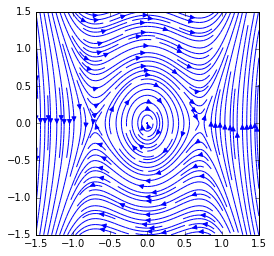

In [17]:
x=linspace(-1.5,1.5,20)
y=linspace(-1.5,1.5,20)
X,Y = meshgrid(x,y)
U=Y
V=4*X**3-2*X

fig, ax = plt.subplots(1)
ax.streamplot(X,Y,U,V,density=2)
ax.autoscale(tight=True)
ax.set_aspect('equal')
show()

#### subplots, axes
```python
fig, axs = plt.subplots(nrows=1, ncols=1, ...) # create Array of subplots and returns figure and axes Array
ax = axes([left,bottom,width,height]) # creates an axes anywhere
```

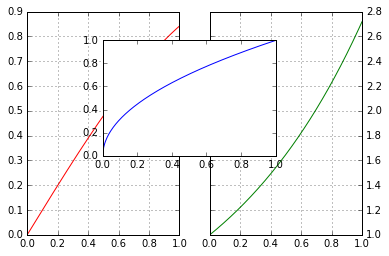

In [18]:
fig,axs = plt.subplots(nrows=1,ncols=2)
axtop=axes([0.3,0.4,0.4,0.4])

x=linspace(0,1,200)
y0=sin(x)
y1=exp(x)
y2=sqrt(x)
axs[0].plot(x,y0,'r')
axs[0].grid()
axs[1].plot(x,y1,'g')
axs[1].tick_params(labelleft='off',labelright='on')
axs[1].grid()
axtop=plot(x,y2,'b')

show()

#### with xkcd() :

Innerhalb einer "`with xkcd() :`" Umgebung werden Linien und Textelemente wie mit Freihand gezeichnet

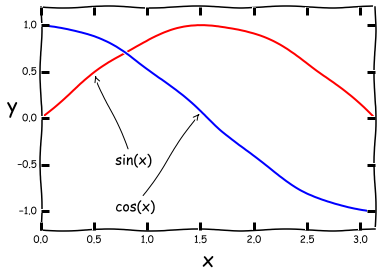

In [19]:
N=50
x=linspace(0,pi)
with xkcd() : 
    plot(x,sin(x),'r',x,cos(x),'b')
    axis('tight')
    ylim(-1.2,1.2)
    xlabel('x',fontsize='20')
    ylabel('y',fontsize=20,rotation=0)
    annotate(s='sin(x)',xy=(0.5,sin(0.5)),xytext=(0.7,-0.5),arrowprops={'arrowstyle':'->'})
    annotate(s='cos(x)',xy=(1.5,cos(1.5)),xytext=(0.7,-1.0),arrowprops={'arrowstyle':'->'})

### Colormaps
Colormaps werden verwendet, um Werten aus einem 1d Intervall Farben zuzuordnen. Hierfuer wird das Intervall in N equidistante Teilabschnitte unterteilt und fuer jeden Teilabschnitt eine Farbe definiert. Matplotlib stellt eine Vielzahl von Colormaps mit verschiedenen Anwendungen zur Verfuegung. 

Bei der Wahl einer Farbskala ist es wichtig darauf zu achten, dass man das Bild auch in Graustufen noch gut erkennen kann, da auch Farbbilder oft mit Schwarz/Weiss Druckern ausgedruckt werden, und da eine nicht geringe Minderheit von Menschen Farbsehschwaechen aufweisen, Helligkeitsstufen jedoch gut unterscheiden kann.

Die folgenden Colormaps koennen mit einfachen `pylab` Anweisungen gesetzt werden
```python
autumn()
bone()
cool()
copper()
flag()
gray()
hot()
hsv()
inferno()
jet()
magma()
pink()
plasma()
prism()
spectral()
spring()
summer()
viridis()
winter()
```

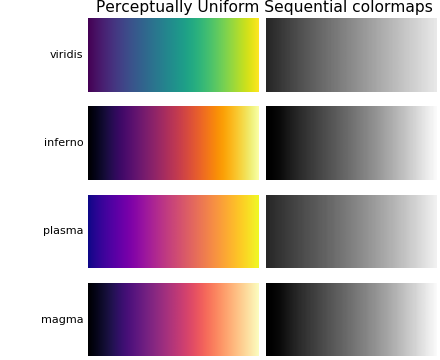

In [20]:
from IPython.display import Image
Image(filename="./grayscale_01_00.png", width=250)

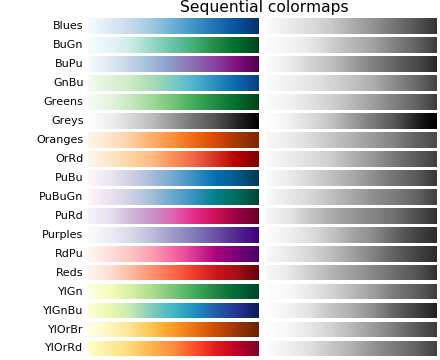

In [21]:
Image(filename="./grayscale_01_01.png", width=250)

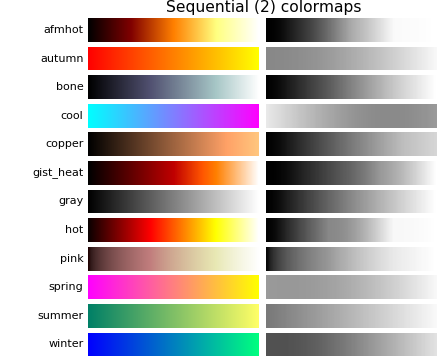

In [22]:
Image(filename="./grayscale_01_02.png", width=250)

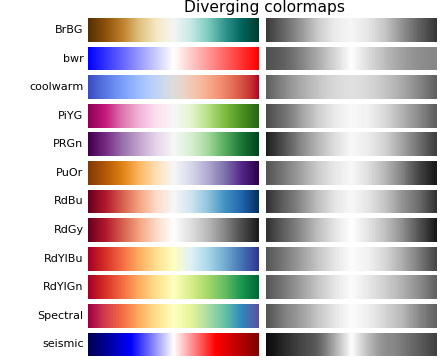

In [23]:
Image(filename="./grayscale_01_03.png", width=250)

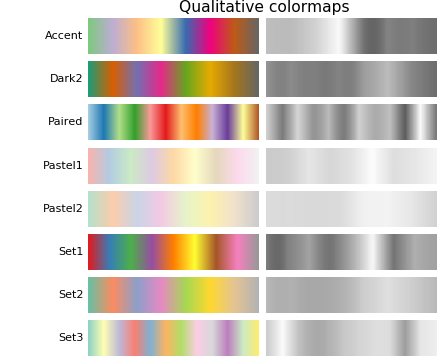

In [24]:
Image(filename="./grayscale_01_04.png", width=250)

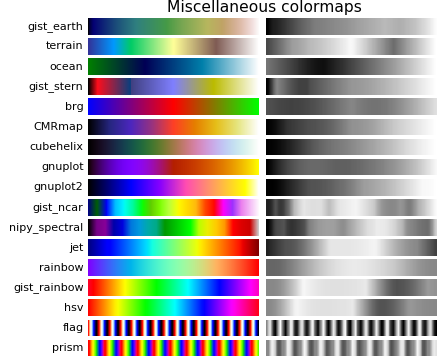

In [25]:
Image(filename="./grayscale_01_05.png", width=250)

Eine Colormap `cm` wird wit `register_cmap(cmap=cm)` registriert und mit `set_cmap(cm)` gesetzt.

Die Funktion
```python
cm = mpl.colors.ListedColormap(colors, name='from_list', N=None)
```
erstellt eine Colormap mit dem Namen `name` aus einer Liste `colors` von matplotlib Farbspezifikationen. Wenn `N>len(colors)` so wird die Liste einfach periodisch erweitert. Alternativ kann `colors` auch ein `Nx3` oder `Nx4` Numpy Array sein (RGB oder RGBAlpha).

Die Funktion
```python
cm = mpl.colors.LinearSegmentedColormap(name, segmentdata, N=256, gamma=1.0)
```
Erzeugt eine Colormap, bei der die Rot, Gruen und Blau sowie ggf. Alpha Werte auf gegebenen Teilintervallen von [0,1] linear interpoliert werden. `segmentdata` ist ein Woerterbuch mit 3-Tupeln $(x_i,z_i,y_i)$ fuer Segmente $[x_i,x_{i+1}]$  auf denen die RGB(Alpha) Werte linear von $y_i$ bis $z_{i+1}$ variieren.
```
segmentdata = {'red': [(0.0,  0.0, 0.0),
                       (0.5,  1.0, 1.0),
                       (1.0,  1.0, 1.0)],

             'green': [(0.0,  0.0, 0.0),
                       (0.25, 0.0, 0.0),
                       (0.75, 1.0, 1.0),
                       (1.0,  1.0, 1.0)],

             'blue':  [(0.0,  0.0, 0.0),
                       (0.5,  0.0, 0.0),
                       (1.0,  1.0, 1.0)],
                       
             'alpha': [(0.0,  0.0, 0.0),
                       (1.0,  1.0, 1.0]) }
```

In [1]:
# starting with matplotlib 1.4 there is an interactive backend for the ipython notebook :
%matplotlib notebook
from pylab import * # plt (pyplot), np (numpy), mpl (matplotlib)

In [2]:
from mpl_toolkits.mplot3d import Axes3D

In [3]:
x=linspace(-5,5,201)
y=linspace(-5,5,201)
X,Y = meshgrid(x,y)
z2=X**2/2+Y**2/2+0.25*X*Y


<IPython.core.display.Javascript object>


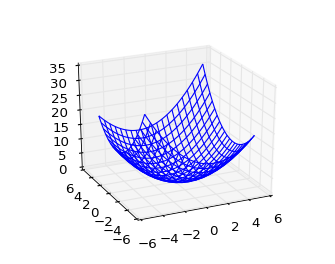

In [4]:
fig=figure('3DPlot')
ax = fig.add_subplot(111,projection='3d')
ax.plot_wireframe(X,Y,z2,rstride=10,cstride=10)
show()

<IPython.core.display.Javascript object>


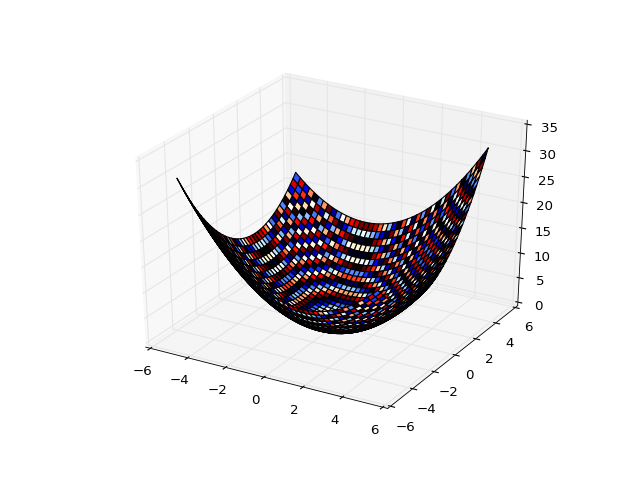

In [13]:
fig=figure('3DPlot')
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,z2,rstride=5,cstride=5,cmap='flag')
show()